In [3]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm

In [4]:
forecast_period = 10

In [5]:
data = pd.read_csv('./sales_train.csv', parse_dates=['Date'], index_col='Date')

In [6]:
data.head(5)

,date_block_num,shop_id,item_id,Price,item_cnt_day
Date,,,,,
2013-02-01,0,59,22154,999.00,1
2013-03-01,0,25,2552,899.00,1
2013-05-01,0,25,2552,899.00,-1
2013-06-01,0,25,2554,1709.05,1
2013-01-15,0,25,2555,1099.00,1


In [7]:
data = data[['Price']]
data = data.sort_values(by=['Date']).groupby(['Date']).mean().round(2)


In [8]:
data.shape

(334, 1)

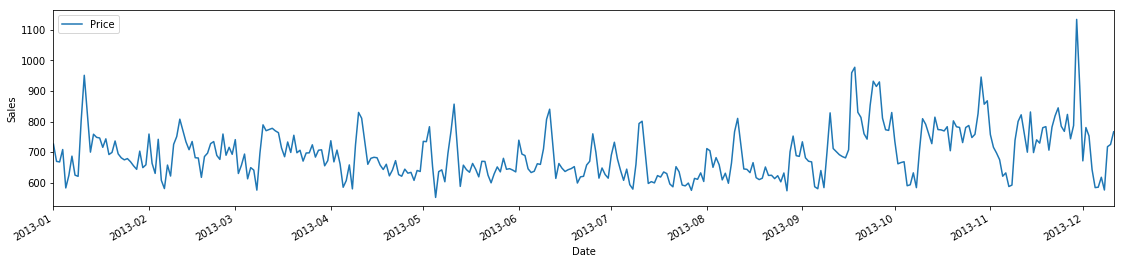

In [9]:
data['Price'] = data.Price.replace('[\,]', '', regex=True).astype(float)
actual = data.plot(label='Actual sale', figsize=(19, 4))
actual.set_xlabel('Date')
actual.set_ylabel('Sales')
plt.legend()
plt.show()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3657.816, BIC=3676.751, Fit time=1.188 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=3879.597, BIC=3887.170, Fit time=0.017 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=3802.100, BIC=3817.247, Fit time=0.262 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=3702.117, BIC=3717.265, Fit time=0.267 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=3656.082, BIC=3678.803, Fit time=1.007 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=3748.267, BIC=3767.202, Fit time=0.354 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=3661.700, BIC=3688.209, Fit time=1.992 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=3814.028, BIC=3829.175, Fit time=0.221 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=3659.983, BIC=3690.278, Fit time=2.179 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_o

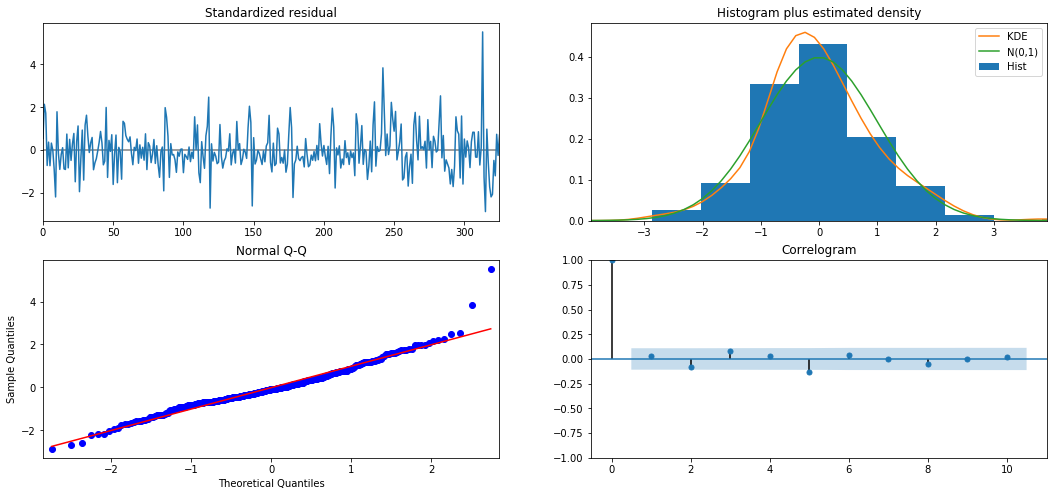

In [10]:
smodel = pm.auto_arima(data, start_p=1, start_q=1, max_p=3, max_q=3, m=7,start_P=0, seasonal=True,d=1, D=1, trace=True,
                                 error_action='ignore',  
                                 suppress_warnings=True, 
                                 stepwise=True)
print(smodel.summary().tables[1])
smodel.plot_diagnostics(figsize=(18, 8))
plt.show()

In [11]:
 # Forecast
n_periods = forecast_period
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
fitted = fitted.round(2)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='D')

predicted = pd.DataFrame()
predicted['Date'] = index_of_fc
predicted['Amount'] = fitted
predicted = predicted.set_index('Date')

frames = [data, predicted]
result = pd.concat(frames)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


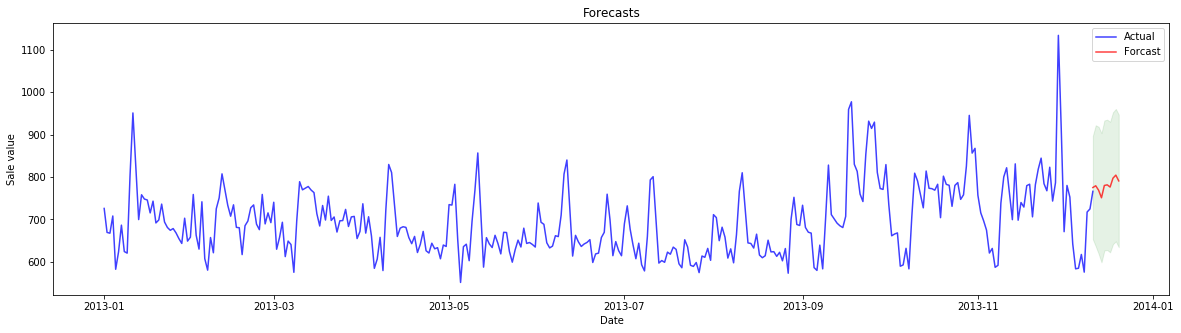

In [12]:
x = np.arange(data.shape[0] + predicted.shape[0])
fig ,ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(result.index[x[:data.shape[0]]], data, alpha=0.75, c='blue', label='Actual')
ax.plot(result.index[x[data.shape[0]:]], predicted, alpha=0.75, c='red',  label='Forcast')  # Forecasts
ax.fill_between(result.index[x[-predicted.shape[0]:]],
                 confint[:, 0], confint[:, 1],
                 alpha=0.1, color='g')
ax.set_title("Forecasts")
ax.set_xlabel("Date")
ax.set_ylabel("Sale value")
ax.legend()
plt.show()

In [15]:
predicted

,Amount
Date,
2013-12-11,775.34
2013-12-12,779.49
2013-12-13,768.98
2013-12-14,751.21
2013-12-15,780.18
2013-12-16,781.70
2013-12-17,776.46
2013-12-18,797.41
2013-12-19,804.59
